# Web scrapping (taux de change, aluminium, brent, fuel france, copper, coil, beam, fuel allemagne)


Dans ce notebook, on récupère les cours de matières premières depuis plusieurs sites internet via du web scrapping. L'objectif est d'analyser ce jeu de donnée par la suite pour le comparer au prix d'achat de ces matières premières.

Les sites utilisés sont :
- Boursorama : 
    - taux de change : https://www.boursorama.com/bourse/devises/cours/historique/3fUSD_EURfromSymbol=USD&toSymbol=EUR&fromLabel=dollar&toLabel=euro
    - cuivre : https://www.boursorama.com/bourse/indices/cours/7xCAUSD15M/
    - aluminium alloy : https://www.boursorama.com/bourse/indices/cours/historique/7xAAUSD15M
- Le site de la banque de St Louis pour le brent : https://fred.stlouisfed.org/series/DCOILBRENTEU#
- le site du conseil national routier pour le fuel en France : www.cnr.fr/espaces/13/indicateurs/43?noContext=1
- Pour l'acier, les valeurs proviennent du site MEPS (https://portal.mepsinternational.com/?logout=true) mais n'ayant pas de login, on a utilisé des extracts fournis


Le tableau créé à la fin a 3 colonnes : Date (format JJ/MM/AAAA), Variable (aluminium (EUR), USD/EUROS, copper, Brent (EUR/barrel), fuel fr EUR/L, coils EUR/ton, beams EUR/ton) et Valeur.

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd

In [2]:
import io
import codecs

In [189]:
li_annees_voulues = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [4]:
urla = 'www.boursorama.com'

In [5]:
#on recupere les liens des differentes pages de boursorama dont on aura besoin

li_url_taux_de_change = []
li_url_alu_alloy = []
li_url_copper = []

for an in li_annees_voulues:
    li_url_taux_de_change.append('www.boursorama.com/_formulaire-periode/?symbol=3fUSD_EUR&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')
    li_url_alu_alloy.append('www.boursorama.com/_formulaire-periode/?symbol=7xAAUSD15M&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')
    li_url_copper.append('www.boursorama.com/_formulaire-periode/?symbol=7xCAUSD15M&historic_search%5BstartDate%5D=06/03/'+ str(an) + '&historic_search%5Bduration%5D=1Y&historic_search%5Bperiod%5D=1')

## Aluminium alloy (boursorama)

In [6]:
#on cree un dictionnaire pour l'aluminium dont les clés sont les dates et les valeurs du cours à cette date
data_alu_alloy = {}

for url in li_url_alu_alloy :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_alu_alloy[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()
            
data_alu_alloy

{'04/03/2016': '1 642.50',
 '03/03/2016': '1 642.50',
 '02/03/2016': '1 603.00',
 '01/03/2016': '1 588.00',
 '29/02/2016': '1 635.00',
 '26/02/2016': '1 636.00',
 '25/02/2016': '1 631.00',
 '24/02/2016': '1 631.50',
 '23/02/2016': '1 636.50',
 '22/02/2016': '1 641.50',
 '19/02/2016': '1 642.50',
 '18/02/2016': '1 642.50',
 '17/02/2016': '1 642.75',
 '16/02/2016': '1 643.00',
 '15/02/2016': '1 643.00',
 '12/02/2016': '1 679.00',
 '11/02/2016': '1 649.25',
 '10/02/2016': '1 659.50',
 '09/02/2016': '1 649.50',
 '08/02/2016': '1 649.50',
 '05/02/2016': '1 630.50',
 '04/02/2016': '1 631.00',
 '03/02/2016': '1 621.00',
 '02/02/2016': '1 631.00',
 '29/01/2016': '1 608.50',
 '28/01/2016': '1 668.50',
 '27/01/2016': '1 648.50',
 '26/01/2016': '1 598.50',
 '25/01/2016': '1 613.50',
 '22/01/2016': '1 619.00',
 '21/01/2016': '1 619.00',
 '20/01/2016': '1 629.00',
 '19/01/2016': '1 629.25',
 '18/01/2016': '1 629.50',
 '15/01/2016': '1 640.25',
 '14/01/2016': '1 640.50',
 '13/01/2016': '1 665.75',
 

## Taux de change (boursorama)

In [7]:
#on cree un dictionnaire pour le taux de change dont les clés sont les dates et les valeurs le taux de change à la date correspondante

data_taux_de_change = {}

for url in li_url_taux_de_change :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_taux_de_change[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()

data_taux_de_change

{'04/03/2016': '0.91',
 '03/03/2016': '0.91',
 '02/03/2016': '0.92',
 '01/03/2016': '0.92',
 '29/02/2016': '0.92',
 '26/02/2016': '0.91',
 '25/02/2016': '0.91',
 '24/02/2016': '0.91',
 '23/02/2016': '0.91',
 '22/02/2016': '0.91',
 '19/02/2016': '0.90',
 '18/02/2016': '0.90',
 '17/02/2016': '0.90',
 '16/02/2016': '0.90',
 '15/02/2016': '0.90',
 '12/02/2016': '0.89',
 '11/02/2016': '0.88',
 '10/02/2016': '0.89',
 '09/02/2016': '0.89',
 '08/02/2016': '0.89',
 '05/02/2016': '0.90',
 '04/02/2016': '0.89',
 '03/02/2016': '0.90',
 '02/02/2016': '0.92',
 '29/01/2016': '0.92',
 '28/01/2016': '0.91',
 '27/01/2016': '0.92',
 '26/01/2016': '0.92',
 '25/01/2016': '0.92',
 '22/01/2016': '0.93',
 '21/01/2016': '0.92',
 '20/01/2016': '0.92',
 '19/01/2016': '0.92',
 '18/01/2016': '0.92',
 '15/01/2016': '0.92',
 '14/01/2016': '0.92',
 '13/01/2016': '0.92',
 '12/01/2016': '0.92',
 '11/01/2016': '0.92',
 '08/01/2016': '0.92',
 '07/01/2016': '0.92',
 '06/01/2016': '0.93',
 '05/01/2016': '0.93',
 '04/01/201

## Copper (boursorama)

In [8]:
#on cree un dictionnaire pour le taux de change dont les clés sont les dates et les valeurs le taux de change à la date correspondante

data_copper = {}

for url in li_url_copper :
    r = requests.get('https://' + url)
    soup = BeautifulSoup(r.content, 'html.parser')
    diff_pages = soup.select('a')

    liens = []
    for el in diff_pages:
        liens.append(el['href'])
    for link in liens:
        rbis = requests.get('https://' + urla + link)
        soup = BeautifulSoup(rbis.content, 'html.parser')
        rows2 = soup.select('tbody tr td')
        for i in range (int(len(rows2)/6)-1):
            data_copper[rows2[6*i].text.strip()] = rows2[6*i + 1].text.strip()

data_copper

{'04/03/2016': '4 997.50',
 '03/03/2016': '4 823.00',
 '02/03/2016': '4 769.00',
 '01/03/2016': '4 698.50',
 '29/02/2016': '4 678.00',
 '26/02/2016': '4 693.00',
 '25/02/2016': '4 589.50',
 '24/02/2016': '4 634.00',
 '23/02/2016': '4 640.50',
 '22/02/2016': '4 689.50',
 '19/02/2016': '4 617.25',
 '18/02/2016': '4 569.75',
 '17/02/2016': '4 589.75',
 '16/02/2016': '4 548.50',
 '15/02/2016': '4 547.00',
 '12/02/2016': '4 484.50',
 '11/02/2016': '4 428.25',
 '10/02/2016': '4 426.25',
 '09/02/2016': '4 495.50',
 '08/02/2016': '4 597.75',
 '05/02/2016': '4 615.25',
 '04/02/2016': '4 669.25',
 '03/02/2016': '4 620.50',
 '02/02/2016': '4 535.25',
 '29/01/2016': '4 544.00',
 '28/01/2016': '4 510.00',
 '27/01/2016': '4 572.00',
 '26/01/2016': '4 518.25',
 '25/01/2016': '4 407.25',
 '22/01/2016': '4 427.00',
 '21/01/2016': '4 420.00',
 '20/01/2016': '4 351.00',
 '19/01/2016': '4 395.00',
 '18/01/2016': '4 370.50',
 '15/01/2016': '4 325.00',
 '14/01/2016': '4 404.50',
 '13/01/2016': '4 384.50',
 

## Brent (St Louis Fed. economic data)

In [32]:
#on récupère le csv sur le site

URL = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DCOILBRENTEU&scale=left&cosd=2017-05-23&coed=2022-05-23&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-05-27&revision_date=2022-05-27&nd=1987-05-20"
response = requests.get(URL)
open("brent_europe.csv", "wb").write(response.content)
brent_data = response.content.decode('utf8')

#on met en forme le jeu de données (format des valeurs et des dates)

a = brent_data.replace('-', '/')
a.replace('\n', ',')

data = io.StringIO(a)
df = pd.read_csv(data, sep=",")
df_brent = df.rename(columns = {'DATE' : 'Date'})

df_brent['Date'] = pd.to_datetime(df_brent['Date'], errors = 'coerce')
df_brent['Date'] = df_brent['Date'].dt.strftime('%d/%m/%Y')
df_brent_vrai = df_brent.set_index('Date')

df_brent_vrai['DCOILBRENTEU'] = df_brent_vrai['DCOILBRENTEU'].str.replace(' ', '')
df_brent_vrai['DCOILBRENTEU'] = pd.to_numeric(df_brent_vrai['DCOILBRENTEU'], errors='coerce')
df_brent_vrai.columns = ['Brent (dollar per barrel)']

## Fuel France (CNR)

In [77]:
data_fuel_fr = {}
r = requests.get('https://' + 'www.cnr.fr/espaces/13/indicateurs/43?noContext=1')
soup = BeautifulSoup(r.content, 'html.parser')
rows_value = soup.select('tr td span')
rows_date = soup.select('tr th')

In [78]:
li_dates = []
for el in rows_date[1:]:
    li_dates.append(el.text.strip())

In [79]:
data_fuel_fr = {}

#ici les données sont arrondies au mois près sur le site : on complète avec 
#des séries de données constantes (égale à la valeur mensuelle indiquée) sur chaque mois

#on normalise le format des dates (JJ/MM/AAAA)

for mois in range(1, 13) :
    for an in li_dates:
        for k in range(1,32):
            if k<=9:
                if mois <= 9:
                    data_fuel_fr['0' + str(k) + '/0' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
                else:
                    data_fuel_fr['0'+str(k) + '/' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
            else :
                if mois <=9:
                    data_fuel_fr[str(k) + '/0' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')
                else:
                    data_fuel_fr[str(k) + '/' + str(mois) + '/' + an] = rows_value[(mois-1)*23 + int(an)-2000].text.strip().replace(',', '.')

                    



## Fuel Allemagne

In [222]:
data_fuel_all = {}
li_dates = []
li_valeurs = []

for an in li_annees_voulues :
    r = requests.get('https://gasoline-germany.com/statistik.phtml?o=7&display=diesel' + str(an))
    soup = BeautifulSoup(r.content, 'html.parser')
    rows_value = soup.select('tr td font b')
    rows_date = soup.select('tr td font')
    li_valeurs.extend(rows_value[1:len(rows_value) - 1])
    for mois in range(len(rows_value)-1):
        for jour in range(1, 31):
            if mois < 10:    
                if jour < 10:
                    data_fuel_all['0' + str(jour) + '/' + '0' + str(mois+1) + '/' + str(an)] = rows_value[mois].text[:5]
                else :
                    data_fuel_all[str(jour) + '/' + '0' + str(mois+1) + '/' + str(an)] = rows_value[mois].text[:5]
            else : 
                if jour < 10:
                    data_fuel_all['0' + str(jour) + '/' + str(mois+1) + '/' + str(an)] = rows_value[mois].text[:5]
                else :
                    data_fuel_all[str(jour) + '/' + str(mois+1) + '/' + str(an)] = rows_value[mois].text[:5]

In [223]:
data_fuel_all

{'01/01/2015': '1,141',
 '02/01/2015': '1,141',
 '03/01/2015': '1,141',
 '04/01/2015': '1,141',
 '05/01/2015': '1,141',
 '06/01/2015': '1,141',
 '07/01/2015': '1,141',
 '08/01/2015': '1,141',
 '09/01/2015': '1,141',
 '10/01/2015': '1,141',
 '11/01/2015': '1,141',
 '12/01/2015': '1,141',
 '13/01/2015': '1,141',
 '14/01/2015': '1,141',
 '15/01/2015': '1,141',
 '16/01/2015': '1,141',
 '17/01/2015': '1,141',
 '18/01/2015': '1,141',
 '19/01/2015': '1,141',
 '20/01/2015': '1,141',
 '21/01/2015': '1,141',
 '22/01/2015': '1,141',
 '23/01/2015': '1,141',
 '24/01/2015': '1,141',
 '25/01/2015': '1,141',
 '26/01/2015': '1,141',
 '27/01/2015': '1,141',
 '28/01/2015': '1,141',
 '29/01/2015': '1,141',
 '30/01/2015': '1,141',
 '01/02/2015': '1,198',
 '02/02/2015': '1,198',
 '03/02/2015': '1,198',
 '04/02/2015': '1,198',
 '05/02/2015': '1,198',
 '06/02/2015': '1,198',
 '07/02/2015': '1,198',
 '08/02/2015': '1,198',
 '09/02/2015': '1,198',
 '10/02/2015': '1,198',
 '11/02/2015': '1,198',
 '12/02/2015': '

## Coils (MEPS) 

In [15]:
file = codecs.open('MEPS-Europe Hot Dipped Galvanised Coil Price Forecast.html')
r = bytes(file.read(), 'utf-8')
soup = BeautifulSoup(r, 'html.parser')
rows_date = soup.select('tr td b')[3:]
rows_value = soup.select('tr td.price')

dic_coils = {}

#permet de normaliser le format des dates (JJ/MM/AAAA)

for k in range(len(rows_date)):
    for i in range(1,32):
        if i <= 9:
            if (5 + k)%12 + 1 < 10:
                dic_coils['0' + str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_coils['0' + str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
        else :
            if (5 + k)%12 + 1 < 10:
                dic_coils[str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_coils[str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)


In [16]:
dic_coils

{'01/06/2017': 734.0,
 '02/06/2017': 734.0,
 '03/06/2017': 734.0,
 '04/06/2017': 734.0,
 '05/06/2017': 734.0,
 '06/06/2017': 734.0,
 '07/06/2017': 734.0,
 '08/06/2017': 734.0,
 '09/06/2017': 734.0,
 '10/06/2017': 734.0,
 '11/06/2017': 734.0,
 '12/06/2017': 734.0,
 '13/06/2017': 734.0,
 '14/06/2017': 734.0,
 '15/06/2017': 734.0,
 '16/06/2017': 734.0,
 '17/06/2017': 734.0,
 '18/06/2017': 734.0,
 '19/06/2017': 734.0,
 '20/06/2017': 734.0,
 '21/06/2017': 734.0,
 '22/06/2017': 734.0,
 '23/06/2017': 734.0,
 '24/06/2017': 734.0,
 '25/06/2017': 734.0,
 '26/06/2017': 734.0,
 '27/06/2017': 734.0,
 '28/06/2017': 734.0,
 '29/06/2017': 734.0,
 '30/06/2017': 734.0,
 '31/06/2017': 734.0,
 '01/07/2017': 701.0,
 '02/07/2017': 701.0,
 '03/07/2017': 701.0,
 '04/07/2017': 701.0,
 '05/07/2017': 701.0,
 '06/07/2017': 701.0,
 '07/07/2017': 701.0,
 '08/07/2017': 701.0,
 '09/07/2017': 701.0,
 '10/07/2017': 701.0,
 '11/07/2017': 701.0,
 '12/07/2017': 701.0,
 '13/07/2017': 701.0,
 '14/07/2017': 701.0,
 '15/07/20

## Beams (MEPS)

In [17]:
file = codecs.open('MEPS-Europe Sections & Beams Price Forecast.html')
r = bytes(file.read(), 'utf-8')
soup = BeautifulSoup(r, 'html.parser')
rows_date = soup.select('tr td b')[3:]
rows_value = soup.select('tr td.price')

dic_beams = {}

#permet de normaliser le format des dates (JJ/MM/AAAA)

for k in range(len(rows_date)):
    for i in range(1,32):
        if i <= 9:
            if (5 + k)%12 + 1 < 10:
                dic_beams['0' + str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_beams['0' + str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
        else :
            if (5 + k)%12 + 1 < 10:
                dic_beams[str(i) + '/0' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)
            else :
                dic_beams[str(i) + '/' + str((5 + k)%12 + 1) + '/' + rows_date[k].text[4:]] = float(rows_value[k].text)


In [18]:
dic_beams

{'01/06/2017': 551.0,
 '02/06/2017': 551.0,
 '03/06/2017': 551.0,
 '04/06/2017': 551.0,
 '05/06/2017': 551.0,
 '06/06/2017': 551.0,
 '07/06/2017': 551.0,
 '08/06/2017': 551.0,
 '09/06/2017': 551.0,
 '10/06/2017': 551.0,
 '11/06/2017': 551.0,
 '12/06/2017': 551.0,
 '13/06/2017': 551.0,
 '14/06/2017': 551.0,
 '15/06/2017': 551.0,
 '16/06/2017': 551.0,
 '17/06/2017': 551.0,
 '18/06/2017': 551.0,
 '19/06/2017': 551.0,
 '20/06/2017': 551.0,
 '21/06/2017': 551.0,
 '22/06/2017': 551.0,
 '23/06/2017': 551.0,
 '24/06/2017': 551.0,
 '25/06/2017': 551.0,
 '26/06/2017': 551.0,
 '27/06/2017': 551.0,
 '28/06/2017': 551.0,
 '29/06/2017': 551.0,
 '30/06/2017': 551.0,
 '31/06/2017': 551.0,
 '01/07/2017': 555.0,
 '02/07/2017': 555.0,
 '03/07/2017': 555.0,
 '04/07/2017': 555.0,
 '05/07/2017': 555.0,
 '06/07/2017': 555.0,
 '07/07/2017': 555.0,
 '08/07/2017': 555.0,
 '09/07/2017': 555.0,
 '10/07/2017': 555.0,
 '11/07/2017': 555.0,
 '12/07/2017': 555.0,
 '13/07/2017': 555.0,
 '14/07/2017': 555.0,
 '15/07/20

## Enregistrement en dataframe

In [241]:
#convertit le dictionnaire data en dataframe en convertissant les valeurs par des float

df_alu_alloy = pd.DataFrame.from_dict(data_alu_alloy, orient = 'index', columns = ['aluminium (USD)'])
df_alu_alloy['aluminium (USD)'] = df_alu_alloy['aluminium (USD)'].str.replace(' ', '')
df_alu_alloy['aluminium (USD)'] = pd.to_numeric(df_alu_alloy['aluminium (USD)'], errors='coerce')

df_taux_de_change = pd.DataFrame.from_dict(data_taux_de_change, orient = 'index', columns = ['USD/EUROS'])
df_taux_de_change['USD/EUROS'] = pd.to_numeric(df_taux_de_change['USD/EUROS'], errors='coerce')

df_copper = pd.DataFrame.from_dict(data_copper, orient = 'index', columns = ['copper'])
df_copper['copper'] = df_copper['copper'].str.replace(' ', '')
df_copper['copper'] = pd.to_numeric(df_copper['copper'], errors='coerce')

df_fuel_fr = pd.DataFrame.from_dict(data_fuel_fr, orient = 'index', columns = ['fuel fr EUR/L'])
df_fuel_fr['fuel fr EUR/L'] = df_fuel_fr['fuel fr EUR/L'].str.replace(' ', '')
df_fuel_fr['fuel fr EUR/L'] = pd.to_numeric(df_fuel_fr['fuel fr EUR/L'], errors='coerce')

df_coils = pd.DataFrame.from_dict(dic_coils, orient = 'index', columns = ['coils EUR/ton'])

df_beams = pd.DataFrame.from_dict(dic_beams, orient = 'index', columns = ['beams EUR/ton'])

df_fuel_all = pd.DataFrame.from_dict(data_fuel_all, orient = 'index', columns = ['fuel all EUR/L'])
df_fuel_all['fuel all EUR/L'] = df_fuel_all['fuel all EUR/L'].str.replace(',', '.')
df_fuel_all['fuel all EUR/L'] = pd.to_numeric(df_fuel_all['fuel all EUR/L'], errors='coerce')



In [235]:
df_alu_alloy

,aluminium (USD)
04/03/2016,1642.5
03/03/2016,1642.5
02/03/2016,1603.0
01/03/2016,1588.0
29/02/2016,1635.0
...,...
16/03/2022,2900.0
15/03/2022,2900.0
14/03/2022,2900.0
10/03/2022,2900.0


## Enregistrement sous le format .csv

In [242]:
#cree un fichier csv avec en index les dates et en colonne les cours aux différents moments

df_alu_alloy.to_csv (r'Alu_alloy_LME.csv', index = True, header=True)
df_taux_de_change.to_csv (r'Taux_echange.csv', index = True, header=True)
df_copper.to_csv (r'copper_LME.csv', index = True, header=True)
df_fuel_fr.to_csv(r'fuel_fr.csv', index = True, header=True)
df_coils.to_csv(r'coils.csv', index = True, header=True)
df_beams.to_csv(r'beams.csv', index=True, header = True)
df_fuel_all.to_csv(r'beams.csv', index=True, header = True)

## Construction tableau final 

In [243]:
#on réunit toutes les données

tab_f = df_alu_alloy.join(df_taux_de_change).join(df_copper)
tab_f = tab_f.join(df_brent_vrai)
tab_f = tab_f.join(df_fuel_fr)
tab_f = tab_f.join(df_coils)
tab_f = tab_f.join(df_beams)
tab_f = tab_f.join(df_fuel_all)

In [244]:
#conversion en euros

tab_f['aluminium (USD)'] = tab_f['aluminium (USD)']*tab_f['USD/EUROS']
tab_f['Brent (dollar per barrel)'] = tab_f['Brent (dollar per barrel)']*tab_f['USD/EUROS']
tab_f.columns = ['aluminium (EUR)', 'USD/EUROS', 'copper', 'Brent (EUR/barrel)', 'fuel fr EUR/L', 'coils EUR/ton', 'beams EUR/ton', 'fuel all EUR/L']

In [245]:
tab_f

,aluminium (EUR),USD/EUROS,copper,Brent (EUR/barrel),fuel fr EUR/L,coils EUR/ton,beams EUR/ton,fuel all EUR/L
04/03/2016,1494.675,0.91,4997.50,NaN,NaN,NaN,NaN,1.039
03/03/2016,1494.675,0.91,4823.00,NaN,NaN,NaN,NaN,1.039
02/03/2016,1474.760,0.92,4769.00,NaN,NaN,NaN,NaN,1.039
01/03/2016,1460.960,0.92,4698.50,NaN,NaN,NaN,NaN,1.039
29/02/2016,1504.200,0.92,4678.00,NaN,NaN,NaN,NaN,0.995
...,...,...,...,...,...,...,...,...
16/03/2022,2639.000,0.91,9969.50,95.1951,NaN,1408.0,1250.0,2.145
15/03/2022,2639.000,0.91,9865.50,95.6774,NaN,1408.0,1250.0,2.145
14/03/2022,2639.000,0.91,9905.75,100.4549,NaN,1408.0,1250.0,2.145
10/03/2022,2639.000,0.91,10044.00,104.2314,NaN,1408.0,1250.0,2.145


<AxesSubplot:>

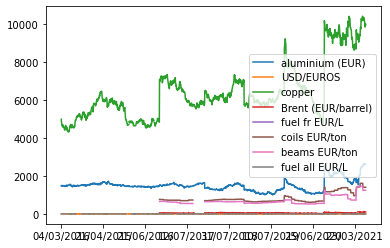

In [246]:
tab_f.plot()

In [247]:
#on enregistre les données selon un format plus pratique pour la suite

tab_f['Date'] = tab_f.index
tab_melted = pd.melt(tab_f, id_vars=['Date'])
tab_melted.to_csv(r'tableau_final.csv', index = True, header = True)

In [248]:
tab_melted

,Date,variable,value
0,04/03/2016,aluminium (EUR),1494.675
1,03/03/2016,aluminium (EUR),1494.675
2,02/03/2016,aluminium (EUR),1474.760
3,01/03/2016,aluminium (EUR),1460.960
4,29/02/2016,aluminium (EUR),1504.200
...,...,...,...
11627,16/03/2022,fuel all EUR/L,2.145
11628,15/03/2022,fuel all EUR/L,2.145
11629,14/03/2022,fuel all EUR/L,2.145
11630,10/03/2022,fuel all EUR/L,2.145
